In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

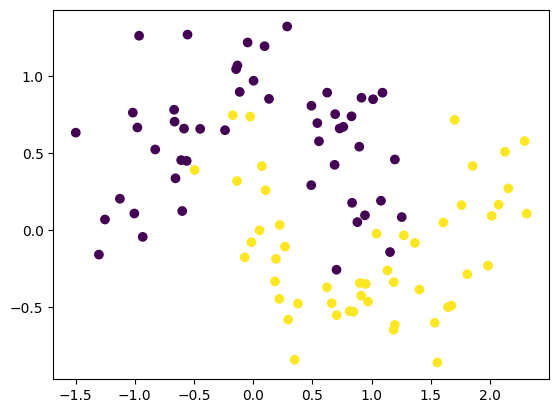

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
model_1 = Sequential([
    Input(shape=(2,)),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam = Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model_1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


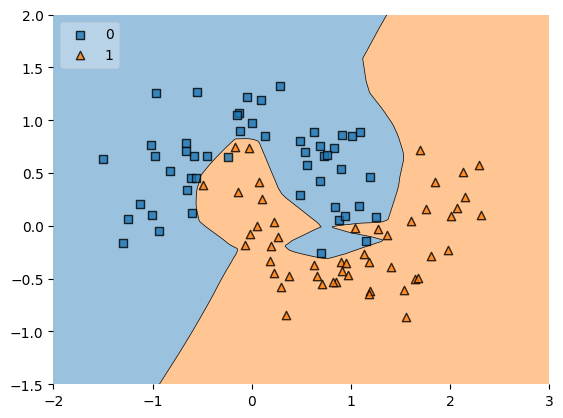

In [11]:
# to plot the decition boundry 

plot_decision_regions(X, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

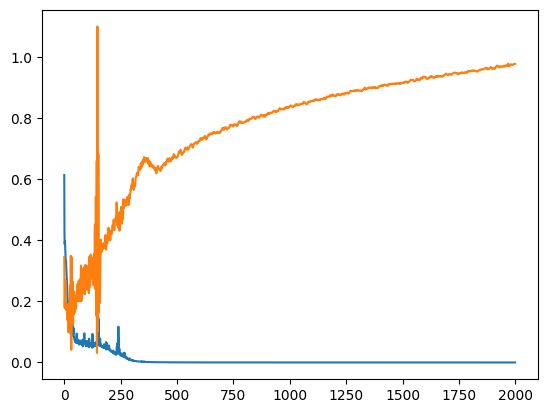

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [25]:
#  **  2nd  **  model   **
#lambda = 0.02 
#kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)

In [14]:
model_2 = Sequential([
    Input(shape=(2,)),
    Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)),
    Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)),
    Dense(1, activation="sigmoid")
])

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
adam = Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model_2.fit(X, y, epochs=1000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


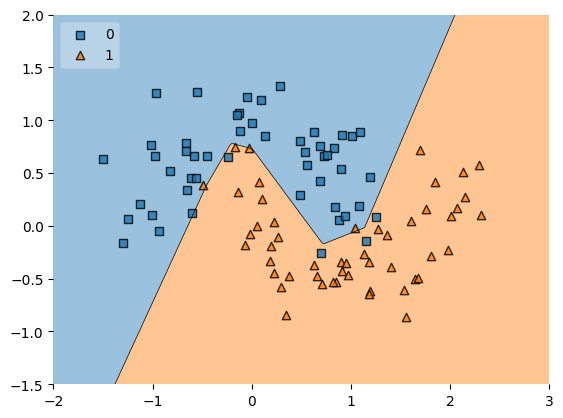

In [16]:
plot_decision_regions(X, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

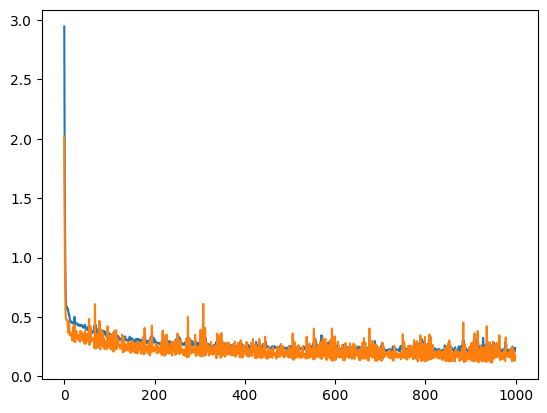

In [17]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [18]:
model1_weight_layer1 = model_1.get_weights()[0].reshape(256)
model2_weight_layer1 = model_2.get_weights()[0].reshape(256)

<Axes: >

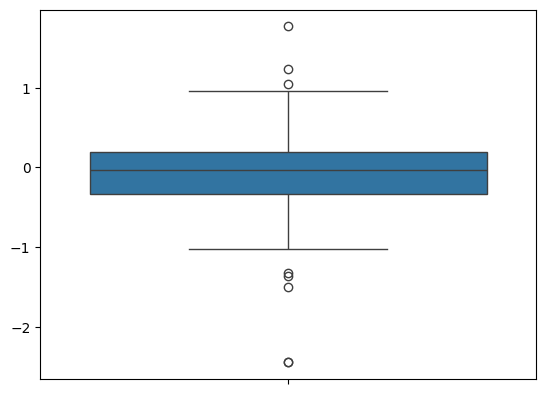

In [19]:
sns.boxplot(model1_weight_layer1)

In [ ]:
sns.boxplot(model2_weight_layer1)

In [20]:
model1_weight_layer1.min()

np.float32(-2.443895)

In [21]:
model2_weight_layer1.min()

np.float32(-0.63504326)

<Axes: ylabel='Density'>

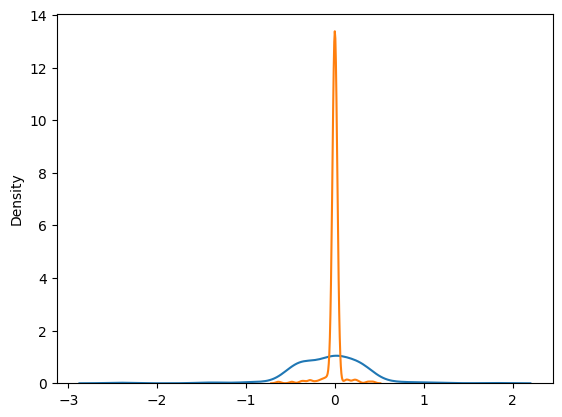

In [22]:
sns.kdeplot(model1_weight_layer1)
sns.kdeplot(model2_weight_layer1)
#sns.distplot(model1_weight_layer1)
#sns.distplot(model2_weight_layer1)

In [24]:
model_1.get_weights()[0].reshape(256)

array([-4.23730135e-01,  9.74515900e-02, -3.58173460e-01, -4.45561022e-01,
        2.50556439e-01, -9.02519468e-03, -4.63394493e-01,  7.29917139e-02,
        1.45380720e-01, -4.53511685e-01,  2.93837219e-01,  3.15154731e-01,
       -3.84987295e-01,  2.31290191e-01,  1.96699813e-01,  3.03596973e-01,
        1.20645702e-01, -1.44416139e-01, -2.53615767e-01,  6.58365786e-02,
       -7.87757896e-03, -2.12054282e-01,  4.75790352e-02, -5.44385472e-03,
       -1.94741085e-01, -4.48184252e-01,  2.73207515e-01, -3.54101002e-01,
       -1.94649845e-02, -5.06606281e-01, -3.97450209e-01, -5.47275782e-01,
       -4.85289305e-01, -4.46082875e-02,  3.29453386e-02,  2.80661553e-01,
       -3.21451351e-02,  1.46691188e-01, -4.12161916e-01, -3.95582348e-01,
       -8.15517455e-02,  7.86947235e-02,  3.59083951e-01, -5.11934087e-02,
       -3.92179668e-01, -2.30046436e-01,  4.85974289e-02,  2.89012313e-01,
       -3.97618055e-01, -5.10404408e-01,  2.56830484e-01, -2.77974486e-01,
        2.19218805e-01, -